# Samarth Motka
---
# 202311023
---
# Lab_5

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools


# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Library for the statistic data vizualisation
import seaborn
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
credit_data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_data.shape

(284807, 31)

In [ ]:
credit_data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
credit_data.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
x_credit = credit_data.iloc[1:200000 , :30]
y_credit = credit_data.iloc[1:200000,30:]

In [ ]:
x_credit.shape

(199999, 30)

In [ ]:
y_credit.shape

(199999, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scale_credit_data = StandardScaler()
x_credit_scaled = scale_credit_data.fit_transform(x_credit)
x_credit_train, x_credit_test, y_credit_train, y_credit_test = train_test_split(
    x_credit_scaled, y_credit, test_size=0.2, random_state=21
)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
mse=[]
svc_model=SVC(C=1,gamma='auto')
svc_model.fit(x_credit_train, y_credit_train)
y_credit_pred = svc_model.predict(x_credit_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
x_credit_train.shape

(159999, 30)

In [ ]:
class_names=np.array(['0','1'])

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

We have detected 51 frauds / 80 total frauds.

So, the probability to detect a fraud is 0.6375
the accuracy is : 0.999175


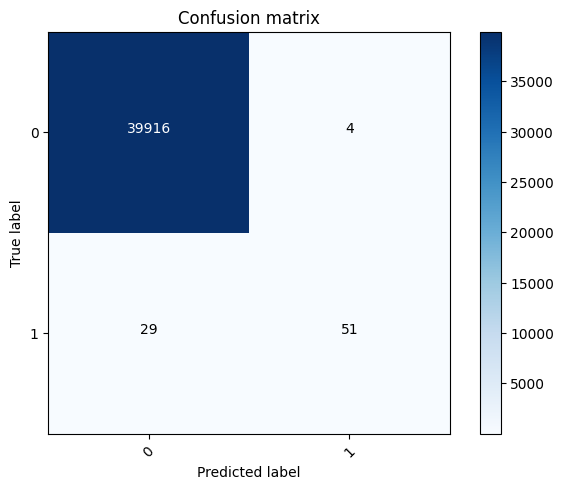

In [ ]:
cm = confusion_matrix(y_credit_test, y_credit_pred)
plot_confusion_matrix(cm,class_names)
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

In [ ]:
print('Our criterion give a result of '
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.709835


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression



# Create a logistic regression model
logistic_model = LogisticRegression()

# Fit the model on the training data
logistic_model.fit(x_credit_train, y_credit_train)

# Predict the target values for the test set
y_credit_pred_log = logistic_model.predict(x_credit_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We have detected 46 frauds / 80 total frauds.

So, the probability to detect a fraud is 0.575
the accuracy is : 0.998825


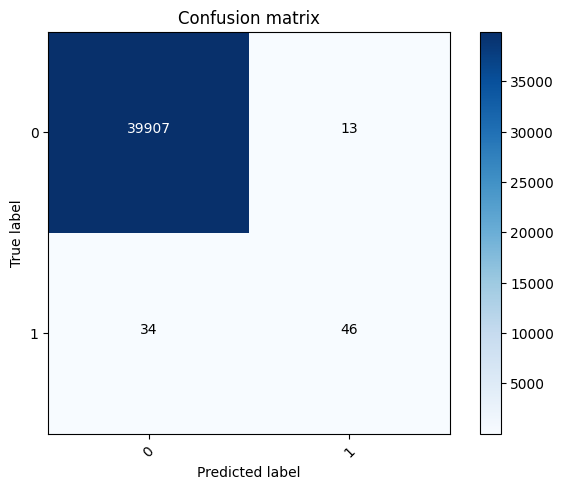

In [ ]:
cm = confusion_matrix(y_credit_test, y_credit_pred_log)
plot_confusion_matrix(cm,class_names)
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier model
random_forest_model = RandomForestClassifier()

# Fit the model on the training data
random_forest_model.fit(x_credit_train, y_credit_train)

# Predict the target values for the test set
y_credit_pred_rf = random_forest_model.predict(x_credit_test)


<ipython-input-105-a27a89edec33>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(x_credit_train, y_credit_train)


We have detected 60 frauds / 80 total frauds.

So, the probability to detect a fraud is 0.75
the accuracy is : 0.99935


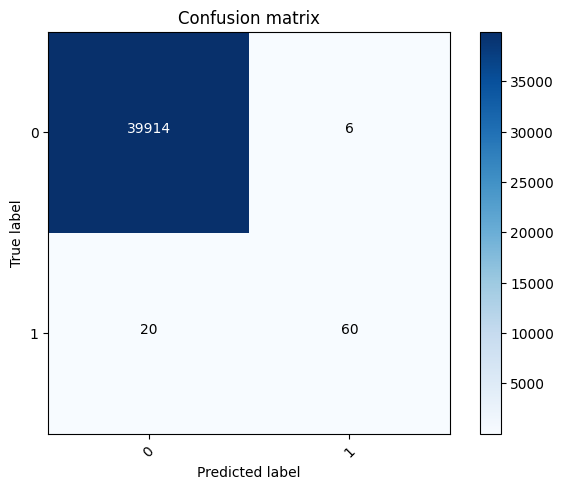

In [ ]:
cm = confusion_matrix(y_credit_test, y_credit_pred_rf)
plot_confusion_matrix(cm,class_names)
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

### Performing Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# Apply undersampling
rus = RandomUnderSampler(random_state=42)
x_credit_resampled, y_credit_resampled = rus.fit_resample(x_credit_train, y_credit_train)

# Reapply classifiers
svc_model.fit(x_credit_resampled, y_credit_resampled)
y_credit_pred = svc_model.predict(x_credit_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We have detected 71 frauds / 80 total frauds.

So, the probability to detect a fraud is 0.8875
the accuracy is : 0.93875


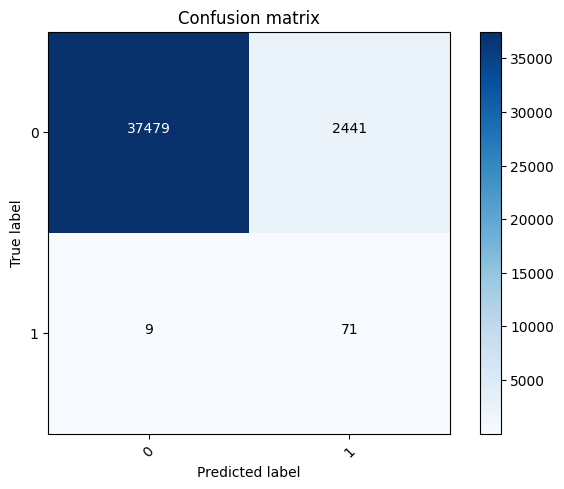

In [ ]:
cm = confusion_matrix(y_credit_test, y_credit_pred)
plot_confusion_matrix(cm,class_names)
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

In [ ]:
logistic_model.fit(x_credit_resampled, y_credit_resampled)
y_credit_pred_log = logistic_model.predict(x_credit_test)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We have detected 71 frauds / 80 total frauds.

So, the probability to detect a fraud is 0.8875
the accuracy is : 0.9662


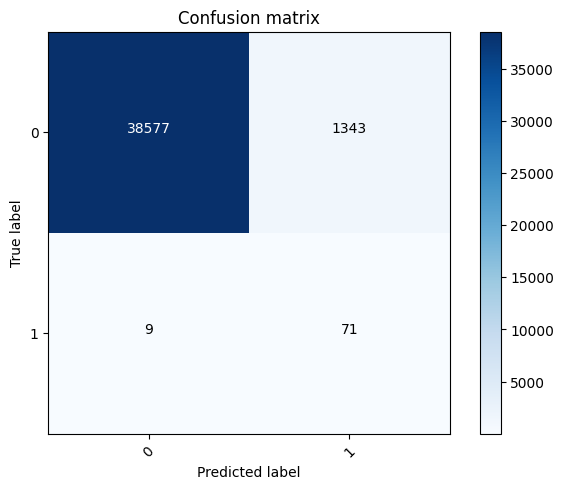

In [ ]:
cm = confusion_matrix(y_credit_test, y_credit_pred_log)
plot_confusion_matrix(cm,class_names)
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

In [ ]:
random_forest_model.fit(x_credit_resampled, y_credit_resampled)
y_credit_pred_rf = random_forest_model.predict(x_credit_test)

<ipython-input-111-3672af09fb9b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(x_credit_resampled, y_credit_resampled)


We have detected 69 frauds / 80 total frauds.

So, the probability to detect a fraud is 0.8625
the accuracy is : 0.98065


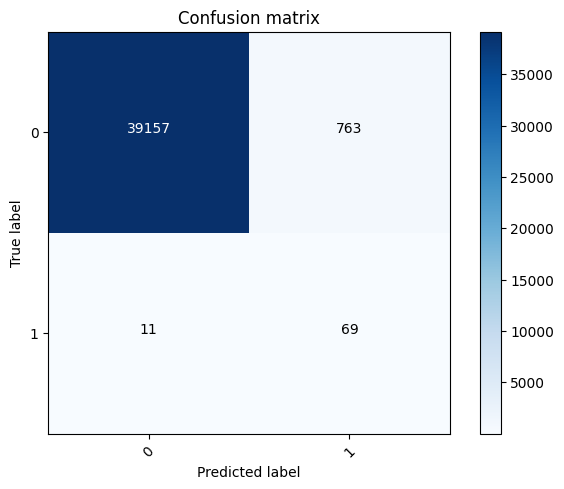

In [ ]:
cm = confusion_matrix(y_credit_test, y_credit_pred_rf)
plot_confusion_matrix(cm,class_names)
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

### Performing Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# Apply oversampling
ros = RandomOverSampler(random_state=42)
x_credit_resampled_over, y_credit_resampled_over = ros.fit_resample(x_credit_train, y_credit_train)

# Reapply classifiers
svc_model=SVC(C=0.5,gamma='auto')

svc_model.fit(x_credit_resampled_over, y_credit_resampled_over)
y_credit_pred = svc_model.predict(x_credit_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
cm = confusion_matrix(y_credit_test, y_credit_pred)
plot_confusion_matrix(cm,class_names)
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

In [ ]:
logistic_model.fit(x_credit_resampled_over, y_credit_resampled_over)
y_credit_pred_log = logistic_model.predict(x_credit_test)



In [ ]:
cm = confusion_matrix(y_credit_test, y_credit_pred_log)
plot_confusion_matrix(cm,class_names)
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

In [ ]:
random_forest_model.fit(x_credit_resampled_over, y_credit_resampled_over)
y_credit_pred_rf = random_forest_model.predict(x_credit_test)

In [ ]:
cm = confusion_matrix(y_credit_test, y_credit_pred_rf)
plot_confusion_matrix(cm,class_names)
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))